In [5]:
from pickle import FALSE # This import is not necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Load the dataset
file_path = '/content/CO2_3.csv'
df = pd.read_csv(file_path)

# Adding a column for t_i
df['t_i'] = (np.arange(len(df)) + 0.5) / 12
# Cleaning the data by dropping rows with missing values (-99.99) in the CO2 column
df_cleaned = df[df.iloc[:, 1] != -99.99].copy()


# Extracting the relevant columns: CO2 concentration and t_i
# df_cleaned.columns = df_cleaned['CO2', 't_i'] # Incorrect way to rename columns
df_cleaned = df_cleaned[['CO2', 't_i']] # Select the desired columns

# Splitting the data into training and test sets (80:20 split)
train_data, test_data = train_test_split(df_cleaned, test_size=0.2, shuffle = False) # Use boolean False

# Fitting the training data to a simple linear model F_1(t) ~ α_0 + α_1*t
X_train = train_data['t_i'].values.reshape(-1, 1)
y_train = train_data['CO2'].values

model = LinearRegression()
model.fit(X_train, y_train)

alpha_0_hat = model.intercept_
alpha_1_hat = model.coef_[0]

# Predictions on the test set
X_test = test_data['t_i'].values.reshape(-1, 1)
y_test = test_data['CO2'].values
y_pred = model.predict(X_test)

# Calculating RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

# Reporting the values of α_0_hat and α_1_hat
print(f'α_0_hat: {alpha_0_hat:.2f}')
print(f'α_1_hat: {alpha_1_hat:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAPE: {mape:.2%}')

α_0_hat: 308.99
α_1_hat: 1.41
RMSE: 10.64
MAPE: 2.45%


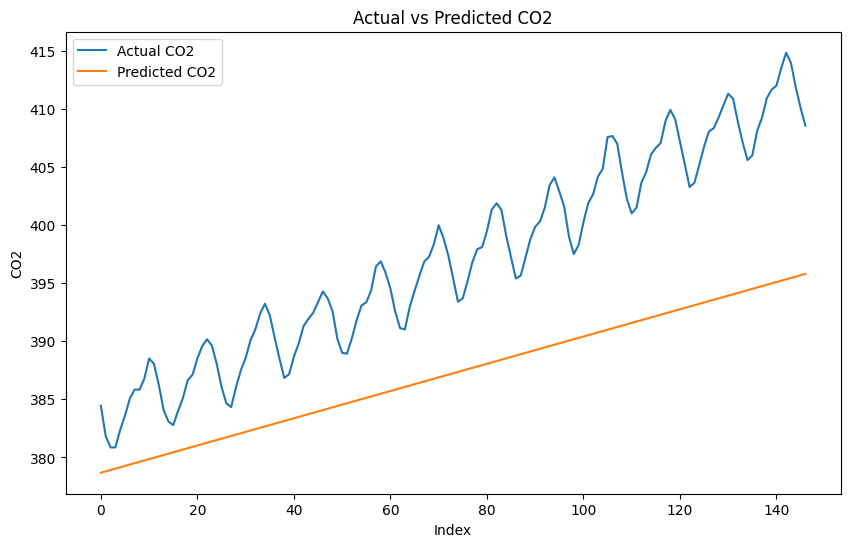

In [6]:
# prompt: plot model

import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual CO2')
plt.plot(y_pred, label='Predicted CO2')
plt.xlabel('Index')
plt.ylabel('CO2')
plt.title('Actual vs Predicted CO2')
plt.legend()
plt.show()